In [263]:
import os, sys
import glob
import json
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_fscore_support

module_path = os.path.abspath("..")
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from dataset_utils.Dataset import Dataset
from dataset_utils.DataInitiator import OmniDataInitiator
from dataset_utils.config import DS_ROOT

print(matplotlib.__version__)

1.4.3


In [ ]:
result_dir = "../train/result/"
target = "with_face_dir_feature/all.json"
with open(os.path.join(result_dir, target), "r") as fr:
    result_all = json.load(fr)

In [296]:
def calculate_total_score(path):
    with open(path, "r") as fr:
        result_all = json.load(fr)
    y_all = np.array([], np.int32)
    t_all = np.array([], np.int32)
    for id in sorted([int(id) for id in result_all.keys()]):
        result = result_all["%d" % id]
        y_all = np.hstack((y_all, np.array(result['test']['y'])))
        t_all = np.hstack((t_all, np.array(result['test']['t'])))
    fscore = precision_recall_fscore_support(t_all, y_all)[2]
    recall = recall_score(t_all, y_all)
    precision = precision_score(t_all, y_all)
    return fscore, recall, precision

def extract_pids_and_scores(path):
    with open(path, "r") as fr:
        result = json.load(fr)
    pids = sorted(result.keys(), key=lambda s: int(s))
    scores = [result[pid]['test']['fscore'] for pid in sorted(result.keys(), key=lambda s: int(s))]
    return pids, scores
    
def display_score(pids, scores, title=None):
    assert len(pids) == len(scores)
    N = len(pids)
    width = 0.7
    x = np.arange(N)
    fig, ax = plt.subplots(figsize=(15, 5)) # Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に作成

    rects = ax.bar(x, scores, width, color='g')
    ax.set_xticks(x+width/2.)
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("person id")
    ax.set_ylabel("fscore")
    ax.set_title(title)

    def attach_scores(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%.2f' % height,
                    ha='center', va='bottom')

    attach_scores(rects)
    plt.show()
    
def display_score_double_bar(pids, scores1, scores2, title=None):
    assert len(pids) == len(scores)
    N = len(pids)
    width = 0.3
    x = np.arange(N)
    fig, ax = plt.subplots(figsize=(15, 5)) # Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に作成

    rects1 = ax.bar(x, scores1, width, color='blue')
    rects2 = ax.bar(x+width, scores2, width, color='green')
    ax.set_xticks(x+width/2.)
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel("person id")
    ax.set_ylabel("fscore")
    ax.set_title(title)

    def attach_scores(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%.2f' % height,
                    ha='center', va='bottom')

    attach_scores(rects1)
    attach_scores(rects2)
    plt.show()

## 人ごとの精度

total recall: 0.6794338051623647
total precision: 0.6743801652892562
total fscore: 0.6768975528826213


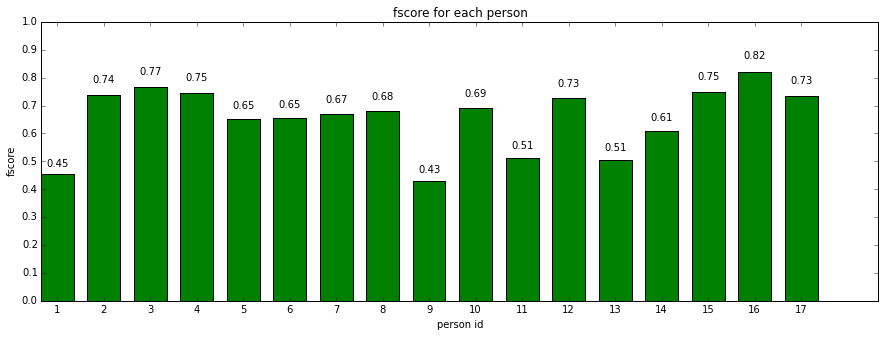

In [306]:
result_path = os.path.join(result_dir, "without_noise_detail", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
display_score(pids, scores, title="fscore for each person")

## ノイズ除去なし vs. あり

total recall: 0.5929011227816009
total precision: 0.6419607843137255
total fscore: 0.6164564112219921
total recall: 0.6794338051623647
total precision: 0.6743801652892562
total fscore: 0.6768975528826213


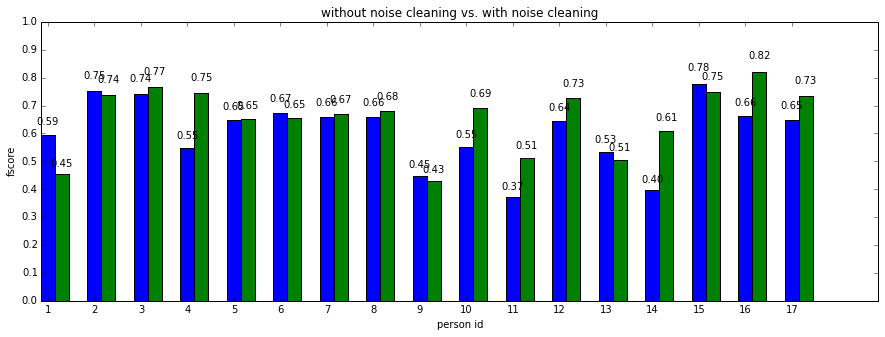

In [297]:
result_path = os.path.join(result_dir, "default_detail", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores1 = scores

result_path = os.path.join(result_dir, "without_noise_detail", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores2 = scores

display_score_double_bar(pids, scores1, scores2, title="without noise cleaning vs. with noise cleaning")

## 負例サンプリングなし vs. あり

total recall: 0.6794338051623647
total precision: 0.6743801652892562
total fscore: 0.6768975528826213
total recall: 0.7431307243963364
total precision: 0.6016177957532861
total fscore: 0.6649282920469362


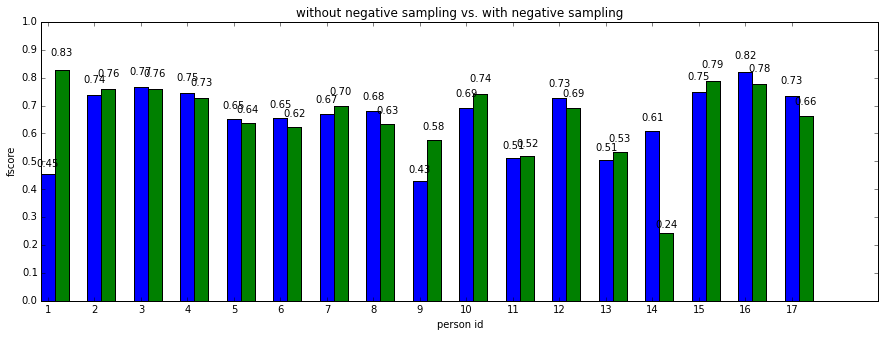

In [299]:
result_path = os.path.join(result_dir, "without_noise_detail", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores1 = scores

result_path = os.path.join(result_dir, "without_noise_sample_unlock", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores2 = scores

display_score_double_bar(pids, scores1, scores2, title="without negative sampling vs. with negative sampling")

## 顔基準点特徴なし vs. 顔基準点特徴あり

total recall: 0.6794338051623647
total precision: 0.6743801652892562
total fscore: 0.6768975528826213
total recall: 0.5438221462163317
total precision: 0.6638830897703549
total fscore: 0.5978848413631023


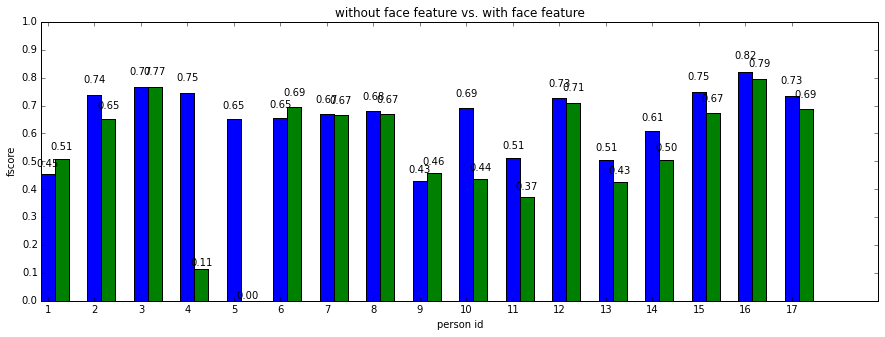

In [301]:
result_path = os.path.join(result_dir, "without_noise_detail", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores1 = scores

result_path = os.path.join(result_dir, "without_noise_face_feature", "all.json")
pids, scores = extract_pids_and_scores(result_path)
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores2 = scores

display_score_double_bar(pids, scores1, scores2, title="without face feature vs. with face feature")

# 場所別精度

In [259]:
data_initiator = OmniDataInitiator()
def extract_pids_and_scores_by_places(path, places):
    with open(path, "r") as fr:
        result = json.load(fr)
    pids = sorted(result.keys(), key=lambda s: int(s))
    scores = []
    y_all = np.array([])
    t_all = np.array([])
    for pid in pids:
        paths = result[pid]['test']['paths']
        index = [i for (i, path) in enumerate(paths) if data_initiator.init(path).place in places]
        y = np.array(result[pid]['test']['y'])[index]
        t = np.array(result[pid]['test']['t'])[index]
        y_all = np.hstack((y_all, y))
        t_all = np.hstack((t_all, t))
        fscore = precision_recall_fscore_support(t, y)[2]
        fscore = fscore[1] if len(fscore) >= 2 else 0
        scores.append(fscore)
    fscores_all = precision_recall_fscore_support(t_all, y_all)[2]
    recall_all = recall_score(t_all, y_all)
    precision_all = precision_score(t_all, y_all)
    return pids, scores, recall_all, precision_all,  fscores_all

## ABCDで学習

### 席A, B (近い席) vs. 席C, D (遠い席)

total recall: 0.6864910790144435
total precision: 0.7100175746924429
total fscore: 0.6980561555075595
total recall: 0.6726530612244898
total precision: 0.6427457098283932
total fscore: 0.6573593936976466


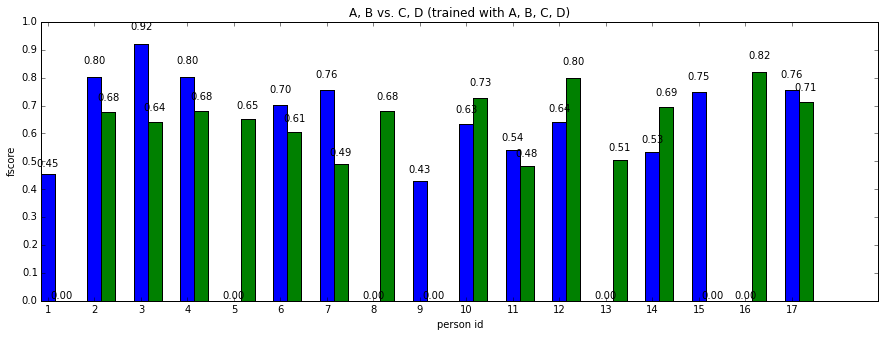

In [303]:
result_path = os.path.join(result_dir, "without_noise_detail", "all.json")
pids, scores, recall, precision, fscores = extract_pids_and_scores_by_places(result_path, {"A", "B"})
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores1 = scores

pids, scores, recall, precision, fscores = extract_pids_and_scores_by_places(result_path, {"C", "D"})
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])
scores2 = scores

display_score_double_bar(pids, scores1, scores2, title="A, B vs. C, D (trained with A, B, C, D)")

In [ ]:
result_path = os.path.join(result_dir, "without_noise_detail", "all.json")
pids, scores = extract_pids_and_scores_by_places(result_path, {"A", "B"})
display_score(pids, scores, "without_noise_detail fscore only AB")

pids, scores = extract_pids_and_scores_by_places(result_path, {"C", "D"})
display_score(pids, scores, "without_noise_detail fscore only CD")

result_path = os.path.join(result_dir, "placeAB_detail", "all.json")
pids, scores = extract_pids_and_scores(result_path)
display_score(pids, scores, "placeAB_detail fscore")
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])

result_path = os.path.join(result_dir, "placeCD_detail", "all.json")
pids, scores = extract_pids_and_scores(result_path)
display_score(pids, scores, "placeCD_detail fscore")
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])

## 全方位カメラデータセット vs. Webカメラデータセット

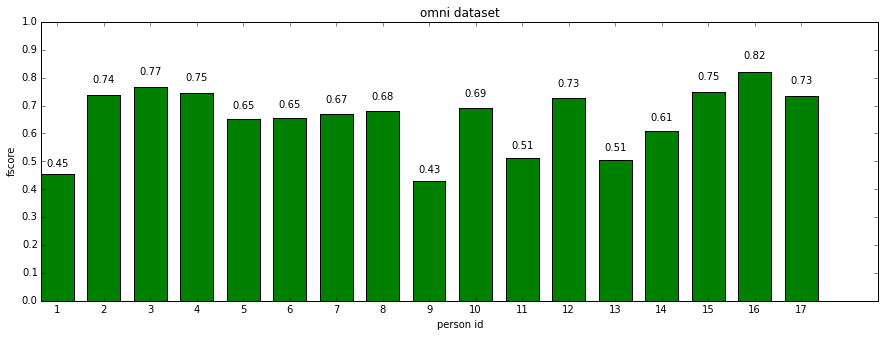

total recall: 0.6794338051623647
total precision: 0.6743801652892562
total fscore: 0.6768975528826213


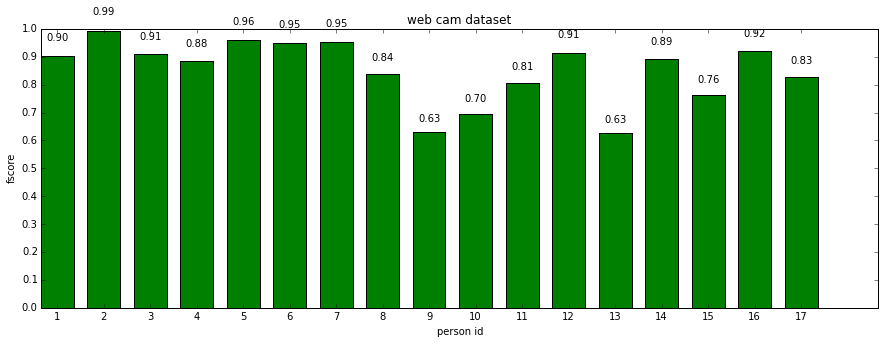

total recall: 0.8727695888285493
total precision: 0.8477769404672193
total fscore: 0.8600917431192661


In [304]:
result_path = os.path.join(result_dir, "without_noise_detail", "all.json")
pids, scores = extract_pids_and_scores(result_path)
display_score(pids, scores, u"omni dataset")
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])

result_path = os.path.join(result_dir, "katayama17", "all.json")
pids, scores = extract_pids_and_scores(result_path)
display_score(pids, scores, u"web cam dataset")
fscores, recall, precision = calculate_total_score(result_path)
print("total recall: %s" % recall)
print("total precision: %s" % precision)
print("total fscore: %s" % fscores[1])